# Convolutional Neural Networks

# Importar Librerías

In [63]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [64]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

Se obtendrán todos los directorios hijo de la ruta y se tomará cada carpeta como un elemento, luego se extraerán las imagenes de cada una.

In [65]:
dirname = os.path.join(os.getcwd(),'D:\\CNN\\resultados\\resul')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  D:\CNN\resultados\resul\
D:\CNN\resultados\resul\asalto 1
D:\CNN\resultados\resul\incendio 6709
D:\CNN\resultados\resul\inundacion 10638
D:\CNN\resultados\resul\robo 12156
D:\CNN\resultados\resul\tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [6710, 10638, 12156, 8765, 11706]
suma Total de imagenes en subdirs: 49975


# Creamos las etiquetas

Se crean las etiquetas de cada uno de los subdirectorios. Es importante que todas las imagenes estén en el mismo formato, que tengan la misma medida y los mismos canales RGB.

In [66]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  49975


In [67]:
import pickle
Incidentes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    Incidentes.append(name[len(name)-1])
    indice=indice+1

for i, img in enumerate(images):
    print(f"Image {i} shape: {np.array(img).shape}")
    

# Guardar el mapeo de clases
with open('mapeo_clases.pkl', 'wb') as f:
    pickle.dump(Incidentes, f)

# Guardar los nombres de los directorios
with open('nombres_directorios.pkl', 'wb') as f:
    pickle.dump(directories, f)


0 asalto
1 incendio
2 inundacion
3 robo
4 tornado
Image 0 shape: (28, 28, 3)
Image 1 shape: (28, 28, 3)
Image 2 shape: (28, 28, 3)
Image 3 shape: (28, 28, 3)
Image 4 shape: (28, 28, 3)
Image 5 shape: (28, 28, 3)
Image 6 shape: (28, 28, 3)
Image 7 shape: (28, 28, 3)
Image 8 shape: (28, 28, 3)
Image 9 shape: (28, 28, 3)
Image 10 shape: (28, 28, 3)
Image 11 shape: (28, 28, 3)
Image 12 shape: (28, 28, 3)
Image 13 shape: (28, 28, 3)
Image 14 shape: (28, 28, 3)
Image 15 shape: (28, 28, 3)
Image 16 shape: (28, 28, 3)
Image 17 shape: (28, 28, 3)
Image 18 shape: (28, 28, 3)
Image 19 shape: (28, 28, 3)
Image 20 shape: (28, 28, 3)
Image 21 shape: (28, 28, 3)
Image 22 shape: (28, 28, 3)
Image 23 shape: (28, 28, 3)
Image 24 shape: (28, 28, 3)
Image 25 shape: (28, 28, 3)
Image 26 shape: (28, 28, 3)
Image 27 shape: (28, 28, 3)
Image 28 shape: (28, 28, 3)
Image 29 shape: (28, 28, 3)
Image 30 shape: (28, 28, 3)
Image 31 shape: (28, 28, 3)
Image 32 shape: (28, 28, 3)
Image 33 shape: (28, 28, 3)
Image 34

In [68]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [69]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (39980, 28, 28, 3) (39980,)
Testing data shape :  (9995, 28, 28, 3) (9995,)


Text(0.5, 1.0, 'Ground Truth : 1')

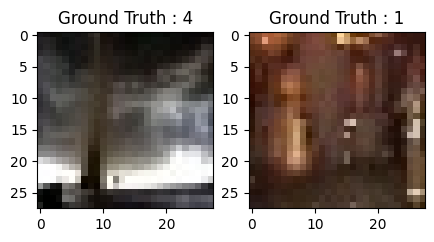

In [70]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

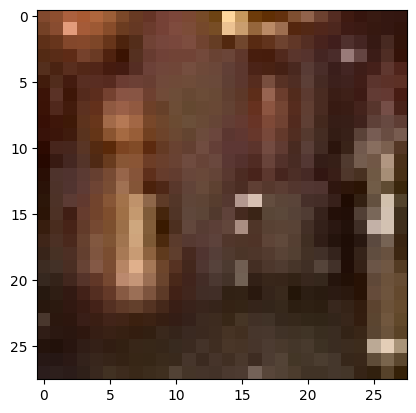

In [71]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [72]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print(len(train_X))
print(len(train_Y_one_hot))


Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]
39980
39980


# Creamos el Set de Entrenamiento y Validación

In [73]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [74]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(31984, 28, 28, 3) (7996, 28, 28, 3) (31984, 5) (7996, 5)


# Creamos el modelo de CNN

In [75]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [76]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))



In [77]:
sport_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                200736    
                                                      

In [78]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])




# Entrenamos el modelo: Aprende a clasificar imágenes

Aqui se dividirán y entrenarán los clasificadores de cata categoría, aqui mismo podemos saber la presición que se graficará mas adelante

In [79]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))



Epoch 1/20
500/500 [==============================] - 6s 11ms/step - loss: 1.5147 - accuracy: 0.3357 - val_loss: 1.3384 - val_accuracy: 0.5938
Epoch 2/20
500/500 [==============================] - 6s 11ms/step - loss: 1.2861 - accuracy: 0.5123 - val_loss: 1.0263 - val_accuracy: 0.7615
Epoch 3/20
500/500 [==============================] - 5s 11ms/step - loss: 1.0771 - accuracy: 0.6055 - val_loss: 0.8134 - val_accuracy: 0.7954
Epoch 4/20
500/500 [==============================] - 6s 11ms/step - loss: 0.9333 - accuracy: 0.6645 - val_loss: 0.6823 - val_accuracy: 0.8304
Epoch 5/20
500/500 [==============================] - 5s 10ms/step - loss: 0.8303 - accuracy: 0.7066 - val_loss: 0.5934 - val_accuracy: 0.8582
Epoch 6/20
500/500 [==============================] - 5s 10ms/step - loss: 0.7621 - accuracy: 0.7363 - val_loss: 0.5383 - val_accuracy: 0.8616
Epoch 7/20
500/500 [==============================] - 5s 11ms/step - loss: 0.7063 - accuracy: 0.7586 - val_loss: 0.4895 - val_accuracy: 0.8758

In [80]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("D:\\CNN\\red\\red.h5")
sport_model.save("D:\\CNN\\red\\red.keras")



C:\Users\Jorgi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluamos la red

Con esto sabremos que tanta precisión y pérdida tiene nuestro dataSet

In [81]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.9247


In [82]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.27500104904174805
Test accuracy: 0.9246623516082764


In [83]:
sport_train.history

{'loss': [1.5146870613098145,
  1.2860718965530396,
  1.0770723819732666,
  0.933322548866272,
  0.830316424369812,
  0.7621155381202698,
  0.7063432335853577,
  0.6631518602371216,
  0.6272404193878174,
  0.5976676344871521,
  0.5728593468666077,
  0.5459712743759155,
  0.5298120379447937,
  0.5068163275718689,
  0.49130669236183167,
  0.47498318552970886,
  0.4589167535305023,
  0.4485751688480377,
  0.4384254515171051,
  0.4245367646217346],
 'accuracy': [0.3357303738594055,
  0.5122561454772949,
  0.6054902672767639,
  0.6645197868347168,
  0.7066345810890198,
  0.7363056540489197,
  0.758629322052002,
  0.7762005925178528,
  0.7898324131965637,
  0.8033078908920288,
  0.815595269203186,
  0.8226613402366638,
  0.8291645646095276,
  0.8417333960533142,
  0.8455477952957153,
  0.8513006567955017,
  0.8568659424781799,
  0.8600237369537354,
  0.86396324634552,
  0.8692783713340759],
 'val_loss': [1.338426113128662,
  1.026319146156311,
  0.8133789300918579,
  0.6823446154594421,
  0.

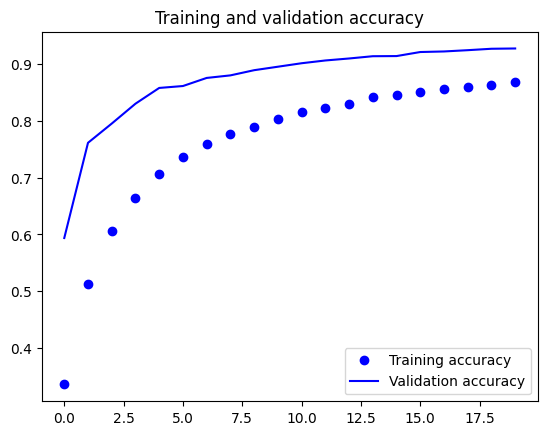

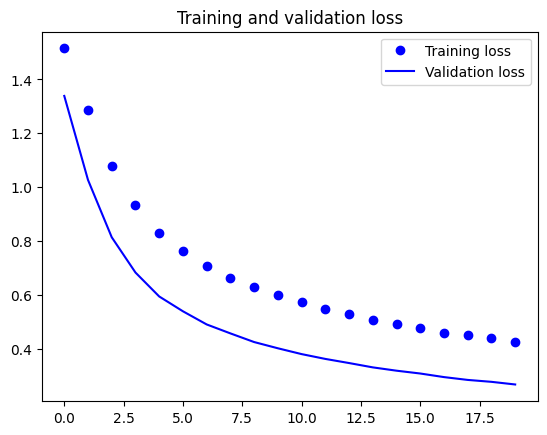

In [84]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
predicted_classes2 = sport_model.predict(test_X)

313/313 [==============================] - 1s 2ms/step


In [86]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [87]:
predicted_classes.shape, test_Y.shape

((9995,), (9995,))

# Aprendamos de los errores: Qué mejorar

Obtendremos ejemplos de nuestro dataSet, con esto sabremos si se requieren mas ejemplos de alguna cosa en específico

Found 9242 correct labels


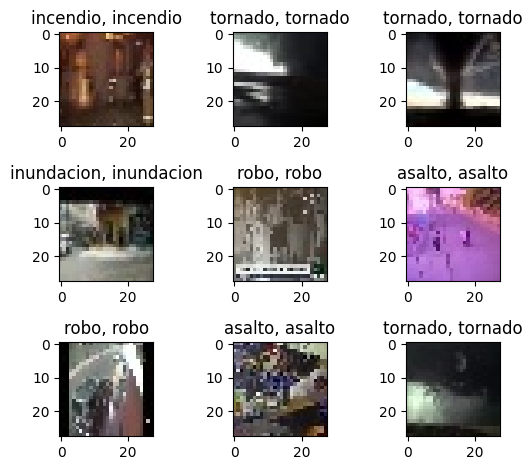

In [88]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[correct]],
                                                    Incidentes[test_Y[correct]]))

    plt.tight_layout()

Found 753 incorrect labels


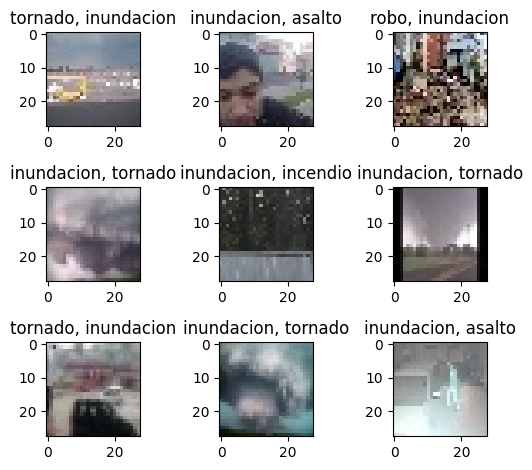

In [89]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[incorrect]],
                                                    Incidentes[test_Y[incorrect]]))
    plt.tight_layout()

In [90]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.90      0.91      1316
     Class 1       0.98      0.99      0.98      2108
     Class 2       0.84      0.92      0.88      2438
     Class 3       0.98      0.94      0.95      1791
     Class 4       0.94      0.88      0.91      2342

    accuracy                           0.92      9995
   macro avg       0.93      0.92      0.93      9995
weighted avg       0.93      0.92      0.93      9995



# Comparaciones

Tenemos dos fragmentos para esto, vamos a hacerlo solo en analisis y también que nos devuelva la imagen con un texto alusivo

In [91]:
import pickle
from skimage.transform import resize
from keras.models import load_model

# Cargar el modelo entrenado desde el archivo .h5
sport_model = load_model('D:\\CNN\\red\\red.h5')

# Cargar el mapeo de clases
with open('mapeo_clases.pkl', 'rb') as f:
    Incidentes = pickle.load(f)

# Lista de imágenes a predecir
filenames = ['D:\\CNN\\comparacion\\T3.jpg']

images = []
for filepath in filenames:
    image = plt.imread(filepath, 0)
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8)  # Convierto de lista a numpy
test_X = X.astype('float32') / 255.

# Realizar predicciones
predicted_classes = sport_model.predict(test_X)

# Imprimir las predicciones
for i, img_tagged in enumerate(predicted_classes):
    predicted_label = Incidentes[np.argmax(img_tagged)]
    print(filenames[i], predicted_label)


1/1 [==============================] - 0s 52ms/step
D:\CNN\comparacion\T3.jpg tornado


1/1 [==============================] - 0s 97ms/step


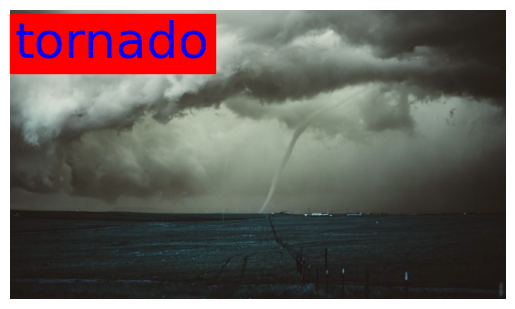

In [12]:
import pickle
from skimage.transform import resize
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Cargar el modelo entrenado desde el archivo .h5
sport_model = load_model('D:\\CNN\\red\\red.h5')

# Cargar el mapeo de clases
with open('mapeo_clases.pkl', 'rb') as f:
    Incidentes = pickle.load(f)

# Lista de imágenes a predecir
filenames = ['D:\\CNN\\comparacion\\PRUEBA8.jpg']

images = []
for filepath in filenames:
    # Leer la imagen con OpenCV
    img = cv.imread(filepath)
    # Convertir la imagen a RGB (cv2 carga en BGR)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Redimensionar la imagen
    img_resized = cv.resize(img_rgb, (28, 28), interpolation=cv.INTER_AREA)
    # Normalizar los valores de píxeles
    img_normalized = img_resized.astype('float32') / 255.
    # Agregar la imagen preprocesada a la lista
    images.append(img_normalized)

# Convertir la lista de imágenes a un array numpy
test_X = np.array(images)

# Realizar predicciones
predicted_classes = sport_model.predict(test_X)

# Imprimir las predicciones en las imágenes y mostrarlas
for i, img_tagged in enumerate(predicted_classes):
    predicted_label = Incidentes[np.argmax(img_tagged)]
    
    # Superponer el texto del resultado en la imagen
    plt.imshow(img)
    plt.axis('off')
    plt.text(10, 20, predicted_label, fontsize=36, color='BLUE', backgroundcolor='RED' , verticalalignment='top')
    plt.show()

